# Определение перспективного тарифа для телеком-компании

## Описание проекта


Я аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.


В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализируем поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

Тариф «Смарт»

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 3 рубля

сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 1 рубль

сообщение: 1 рубль

1 Гб интернет-трафика: 150 рублей

# Шаг 1. Загружаем необходимые библиотеки. Открываем файлы с данными и изучаем общую информацию

In [1]:
#импортируем библиотеки
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
#загружаем наши данные
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
#циклом выведем базовую инфу по таблицам
tabs = [calls, internet, messages, tariffs, users]
for tab in tabs:
    tab.info()
    print('названия столбцев', tab.columns)
    print('размер таблицы:', tab.shape)
    print('количество пропусков:', '\n', tab.isna().sum())
    print('количество явных дубликатов:', tab.duplicated().sum())
    display(tab.head(3))
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
названия столбцев Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')
размер таблицы: (202607, 4)
количество пропусков: 
 id           0
call_date    0
duration     0
user_id      0
dtype: int64
количество явных дубликатов: 0


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
названия столбцев Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')
размер таблицы: (149396, 5)
количество пропусков: 
 Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
количество явных дубликатов: 0


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
названия столбцев Index(['id', 'message_date', 'user_id'], dtype='object')
размер таблицы: (123036, 3)
количество пропусков: 
 id              0
message_date    0
user_id         0
dtype: int64
количество явных дубликатов: 0


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
названия столбцев Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')
размер таблицы: (2, 8)
количество пропусков: 
 messages_included        0
mb_per_month_included    0
minutes_included    

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
названия столбцев Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')
размер таблицы: (500, 8)
количество пропусков: 
 user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
количество явных дубликатов: 0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


с первого взгляда данные выглядят хорошо, нет пропусков, и нет дубликатов
в таблице 'internet' есть солбе Unnamed: 0, исправим его на следущем шаге

# Шаг 2. Подготовим данные

Приведем данные к нужным типам;
Найдите и исправьте ошибки в данных, если они есть.
В данных есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
в таблице 'users' есть пропуски данных, это значит, что тариф ещё действовал на момент выгрузки данных. 

In [5]:
internet.head(), internet.tail()

(   Unnamed: 0      id  mb_used session_date  user_id
 0           0  1000_0   112.95   2018-11-25     1000
 1           1  1000_1  1052.81   2018-09-07     1000
 2           2  1000_2  1197.26   2018-06-25     1000
 3           3  1000_3   550.27   2018-08-22     1000
 4           4  1000_4   302.56   2018-09-24     1000,
         Unnamed: 0        id  mb_used session_date  user_id
 149391      149391  1499_152   318.90   2018-10-03     1499
 149392      149392  1499_153   490.13   2018-12-14     1499
 149393      149393  1499_154     0.00   2018-10-27     1499
 149394      149394  1499_155  1246.32   2018-11-26     1499
 149395      149395  1499_156   544.37   2018-10-26     1499)

In [6]:
display(internet.head(), internet.tail())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [7]:
#просто удалим этот столбец, он просто дублирует порядковый номер
internet.drop('Unnamed: 0', axis=1, inplace=True) 
#сразуже проверим результаты
print(internet.head(5), internet.tail(5))

       id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000               id  mb_used session_date  user_id
149391  1499_152   318.90   2018-10-03     1499
149392  1499_153   490.13   2018-12-14     1499
149393  1499_154     0.00   2018-10-27     1499
149394  1499_155  1246.32   2018-11-26     1499
149395  1499_156   544.37   2018-10-26     1499


In [8]:
#округлим минуты звонков, так как та тариф говорит нам, что проговорив 1 секунду, будет защитано, как 1 минута 
calls['duration'] = np.ceil(calls['duration'])



print(calls.head())

       id   call_date  duration  user_id
0  1000_0  2018-07-25       0.0     1000
1  1000_1  2018-08-17       0.0     1000
2  1000_2  2018-06-11       3.0     1000
3  1000_3  2018-09-21      14.0     1000
4  1000_4  2018-12-15       6.0     1000


In [9]:
# приведем данные в таблицах к нужному типу datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Посчитаем для каждого пользователя:

[X] количество сделанных звонков и израсходованных минут разговора по месяцам;

[X] количество отправленных сообщений по месяцам;

[X] объем израсходованного интернет-трафика по месяцам;

[X] помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет- трафика; 

остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [10]:
# добавим новую колонку 'месяц' в каждую таблицу
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month
display(calls.head(1),messages.head(1), internet.head(1))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11


In [11]:
calls['call_date'].astype('datetime64[M]') 

0        2018-07-01
1        2018-08-01
2        2018-06-01
3        2018-09-01
4        2018-12-01
            ...    
202602   2018-12-01
202603   2018-10-01
202604   2018-11-01
202605   2018-10-01
202606   2018-12-01
Name: call_date, Length: 202607, dtype: datetime64[ns]

In [12]:
# считаем количество сделанных звонков и израсходованных минут разговора по месяцам
calls_gr = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
calls_gr.columns = ['duration', 'calls']
calls_gr.head(5)

duration  calls
user_id month                 
1000    5         159.0     22
        6         172.0     43
        7         340.0     47
        8         408.0     52
        9         466.0     58

In [13]:
# считаем количество отправленных сообщений по месяцам
mes_gr = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
mes_gr.columns = ['messages']
mes_gr.head()

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

In [14]:
# считаем объем израсходованного интернет-трафика по месяцам
int_gr = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
int_gr.head()

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

In [15]:
# округляем мегабайты, чтобы потом перевести их в гигабайты
int_gr['gb_used'] = int_gr['mb_used'] / 1024
int_gr['gb_used'] = np.ceil(int_gr['gb_used'])
int_gr.head()

mb_used  gb_used
user_id month                   
1000    5       2253.49      3.0
        6      23233.77     23.0
        7      14003.64     14.0
        8      14055.93     14.0
        9      14568.91     15.0

In [16]:
# Посчитаем помесячную выручку с каждого пользователя
# Для этого объединим данные по звонкам, сообщениям и пользованию интернетом по каждому пользователю помесячно, присоединяя к большей таблице меньшую

month_inc = int_gr.merge(calls_gr, how='outer', on=['user_id', 'month'])
month_inc = month_inc.merge(mes_gr, how='outer', on=['user_id','month'])
month_inc.head()

mb_used  gb_used  duration  calls  messages
user_id month                                              
1000    5       2253.49      3.0     159.0   22.0      22.0
        6      23233.77     23.0     172.0   43.0      60.0
        7      14003.64     14.0     340.0   47.0      75.0
        8      14055.93     14.0     408.0   52.0      81.0
        9      14568.91     15.0     466.0   58.0      57.0

In [17]:
month_inc.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1446, 8)
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mb_used   3203 non-null   float64
 1   gb_used   3203 non-null   float64
 2   duration  3174 non-null   float64
 3   calls     3174 non-null   float64
 4   messages  2717 non-null   float64
dtypes: float64(5)
memory usage: 155.5 KB


Отлично! у нас появилась новая таблица, к которой будем присоединять другие данные и получим информацио о доходе с каждого пользователя помесячно

In [18]:
print(f'кол-во звонков до джойна:{calls_gr.duration.sum()}, кол-во звонков после джойна:{month_inc.duration.sum()}')
print(f'кол-во смс до джойна:{mes_gr.messages.sum()}, кол-во смс после джойна:{month_inc.messages.sum()}')
print(f'кол-во мегов до джойна:{int_gr.mb_used.sum()}, кол-во мегов после джойна:{month_inc.mb_used.sum()}' )

кол-во звонков до джойна:1450301.0, кол-во звонков после джойна:1450301.0
кол-во смс до джойна:123036, кол-во смс после джойна:123036.0
кол-во мегов до джойна:55305267.730000004, кол-во мегов после джойна:55305267.730000004


In [19]:
user_tariff = users[['user_id', 'city', 'tariff']]
user_tariff.head()

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [20]:
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']

In [21]:
user_tariff = user_tariff.merge(tariffs, how='left', on='tariff')
user_tariff.head()

,user_id,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1001,Москва,smart,50,15360,500,550,200,3,3
2,1002,Стерлитамак,smart,50,15360,500,550,200,3,3
3,1003,Москва,ultra,1000,30720,3000,1950,150,1,1
4,1004,Новокузнецк,ultra,1000,30720,3000,1950,150,1,1


In [22]:
# Проиндексируем таблицу, чтобы объединить ее с таблицей user_tariff по столбцу user_id
month_inc = month_inc.reset_index()

In [23]:
month_inc = month_inc.merge(user_tariff, how='right', on='user_id')
month_inc.head()

,user_id,month,mb_used,gb_used,duration,calls,messages,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,2253.49,3.0,159.0,22.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,23233.77,23.0,172.0,43.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,14003.64,14.0,340.0,47.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,14055.93,14.0,408.0,52.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,14568.91,15.0,466.0,58.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [24]:
def new_col(row):
    if row == 'ultra':
        return 30
    else:
        return 15
    
month_inc['gb_per_month_included'] = month_inc['tariff'].apply(new_col)


In [25]:
# Посчитаем помесячный доход с каждого пользователя за телефонные разговоры, смс-сообщения и интернет-трафик свыше тарифа
def revenue_from_smth(row, str1, str2, multi, str3):
    month_inc = np.ceil((row[str1] - row[str2]) / multi) * row[str3]
    if month_inc> 0:
        return month_inc
    return 0

def revenue_from_minutes(row):
    return revenue_from_smth(row, 'duration', 'minutes_included', 1, 'rub_per_minute')

def revenue_from_sms(row):
    return revenue_from_smth(row, 'messages', 'messages_included', 1, 'rub_per_message')

def revenue_from_traffic(row):
    return revenue_from_smth(row, 'gb_used', 'gb_per_month_included', 1, 'rub_per_gb')

In [26]:
month_inc['minutes_cost'] = month_inc.apply(revenue_from_minutes, axis=1)
month_inc['sms_cost'] = month_inc.apply(revenue_from_sms, axis=1)
month_inc['gb_cost'] = month_inc.apply(revenue_from_traffic, axis=1)

In [27]:
month_inc['total'] = month_inc['rub_monthly_fee'] + month_inc['minutes_cost'] + month_inc['sms_cost'] + month_inc['gb_cost']
month_inc.sample(7)

,user_id,month,mb_used,gb_used,duration,calls,messages,city,tariff,messages_included,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,minutes_cost,sms_cost,gb_cost,total
2790,1432,10.0,21298.55,21.0,750.0,98.0,79.0,Улан-Удэ,smart,50,...,500,550,200,3,3,15,750.0,87.0,1200.0,2587.0
1607,1253,10.0,26019.29,26.0,272.0,44.0,89.0,Астрахань,ultra,1000,...,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
2694,1420,12.0,28638.78,28.0,231.0,36.0,14.0,Сочи,smart,50,...,500,550,200,3,3,15,0.0,0.0,2600.0,3150.0
2405,1378,6.0,13536.42,14.0,486.0,71.0,17.0,Иркутск,smart,50,...,500,550,200,3,3,15,0.0,0.0,0.0,550.0
2692,1420,10.0,30084.56,30.0,210.0,30.0,10.0,Сочи,smart,50,...,500,550,200,3,3,15,0.0,0.0,3000.0,3550.0
863,1135,6.0,18322.53,18.0,564.0,73.0,25.0,Архангельск,smart,50,...,500,550,200,3,3,15,192.0,0.0,600.0,1342.0
105,1014,10.0,22539.37,23.0,332.0,49.0,51.0,Чебоксары,smart,50,...,500,550,200,3,3,15,0.0,3.0,1600.0,2153.0


In [28]:
month_inc['total'].sum()

4916951.0

In [29]:
month_inc.head()

,user_id,month,mb_used,gb_used,duration,calls,messages,city,tariff,messages_included,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,minutes_cost,sms_cost,gb_cost,total
0,1000,5.0,2253.49,3.0,159.0,22.0,22.0,Краснодар,ultra,1000,...,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
1,1000,6.0,23233.77,23.0,172.0,43.0,60.0,Краснодар,ultra,1000,...,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
2,1000,7.0,14003.64,14.0,340.0,47.0,75.0,Краснодар,ultra,1000,...,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
3,1000,8.0,14055.93,14.0,408.0,52.0,81.0,Краснодар,ultra,1000,...,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
4,1000,9.0,14568.91,15.0,466.0,58.0,57.0,Краснодар,ultra,1000,...,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0


# Промежуточный вывод (2 шага)

Данные приведены к нужным типам (datetime), были найдены и исправлены ошибки в данных (удалили один дублирущий столбец)
В данных есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять. в таблице 'users' есть пропуски данных, это значит, что тариф ещё действовал на момент выгрузки данных.

Округлили минуты звонков, так как та тариф говорит нам, что проговорив 1 секунду, будет защитано, как 1 минута, а также округлили трафик использованного интернета.

Посчитали для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя;

была создана таблица с информацией о доходе с каждого пользователя помесячно (month_inc)

Данные очень аккуратные и чистые, без дубликатов

# Шаг 3. Проанализируем данные

Опишем поведение клиентов оператора, исходя из выборки:

[X] cколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

[X] среднее количество, дисперсию и стандартное отклонение

[X] гистограммы

[X] распределения


In [30]:
# Найдем среднее количество, стандартное отклонение и дисперсию минут разговора, сообщений и интернет трафика пользователей тарифа ultra

month_inc.query('tariff == "ultra"')[['duration', 'messages', 'mb_used']].describe()

,duration,messages,mb_used
count,951.000000,795.000000,975.000000
mean,545.451104,61.161006,19668.485262
std,306.925754,45.931026,9943.050284
min,0.000000,1.000000,0.000000
25%,310.000000,24.000000,12008.305000
50%,528.000000,51.000000,19394.290000
75%,756.500000,87.500000,26896.550000
max,1673.000000,224.000000,49745.690000


In [31]:
# дисперсия
np.var(month_inc.query('tariff == "ultra"')[['duration', 'messages', 'mb_used']])

duration    9.410436e+04
messages    2.107006e+03
mb_used     9.876285e+07
dtype: float64

Средняя длительность разговоров в месяц пользователей тарифа ultra - 545 минут, чуть больше медианы в 528 минуту. Стандартное отклонение большое, 306 минут.

Среднее количество сообщений в месяц - 61 сообщение, чуть больше медианы в 51 сообщение. Значит есть выбросы, когда клиенты отправляют много сообщений в месяц. Стандартное отклонение большое и составляет 46 сообщений.

Средний объем использованного интернет-трафика за месяц составляет 19668 мб и чуть больше медианы в 19394 мб. Значит тоже есть выбросы, то есть пользователи, кто очень много использует интернет. Стандартное отклонение равно 9943 мб.

Можно сделать вывод, что ряды пользователей тарифа ultra неоднородны: в них есть и те, кто очень много разговаривает и те, кто отправляет очень много сообщений, и те, кто помногу использует интернет. Значит, у этой группы есть потенциал роста.

In [32]:
# Найдем среднее количество, стандартное отклонение и дисперсию минут разговора, сообщений и интернет трафика пользователей тарифа smart
month_inc.query('tariff == "smart"')[['duration', 'messages', 'mb_used']].describe()

,duration,messages,mb_used
count,2223.000000,1922.000000,2228.000000
mean,419.062978,38.716441,16215.661849
std,189.325618,26.787949,5861.736234
min,0.000000,1.000000,0.000000
25%,285.000000,17.000000,12649.272500
50%,423.000000,34.000000,16507.740000
75%,545.500000,55.000000,20043.792500
max,1435.000000,143.000000,38552.450000


In [33]:
# дисперсия
np.var(month_inc.query('tariff == "smart"')[['duration', 'messages', 'mb_used']])

duration    3.582807e+04
messages    7.172208e+02
mb_used     3.434453e+07
dtype: float64

In [34]:
month_inc.groupby('tariff')[['duration', 'messages', 'mb_used']].describe().T

tariff                 smart         ultra
duration count   2223.000000    951.000000
         mean     419.062978    545.451104
         std      189.325618    306.925754
         min        0.000000      0.000000
         25%      285.000000    310.000000
         50%      423.000000    528.000000
         75%      545.500000    756.500000
         max     1435.000000   1673.000000
messages count   1922.000000    795.000000
         mean      38.716441     61.161006
         std       26.787949     45.931026
         min        1.000000      1.000000
         25%       17.000000     24.000000
         50%       34.000000     51.000000
         75%       55.000000     87.500000
         max      143.000000    224.000000
mb_used  count   2228.000000    975.000000
         mean   16215.661849  19668.485262
         std     5861.736234   9943.050284
         min        0.000000      0.000000
         25%    12649.272500  12008.305000
         50%    16507.740000  19394.290000
         75%    20043.792500  26896.550000
         max    38552.450000  49745.690000

In [35]:
month_inc.groupby('tariff')[['duration', 'messages', 'mb_used']].var().T

tariff,smart,ultra
duration,3.584419e+04,9.420342e+04
messages,7.175942e+02,2.109659e+03
mb_used,3.435995e+07,9.886425e+07


Средняя длительность разговоров в месяц пользователей тарифа smart 419 минут и почти равна медиане в 423 минут. Значит выбросов очень мало, все значения находятся в нормальном распределении. Стандартное отклонение небольшое, 189 минуты.

Среднее количество сообщений в месяц - 38 сообщения и оно чуть больше медианы в 34 сообщений. Значит выбросов тоже мало. Стандартное отклонение составляет 27 сообщений.

Средний объем использованного интернет-трафика за месяц составляет 16236 мб и почти равен медиане 16532 мб. Значит выбросов очень мало. Стандартное отклонение равно 5868 мб.

Можно сделать вывод, что пользователи тарифа smart представляют устоявшуюся группу, без выдающихся значений по длительности разговоров, количеству отправляемых сообщений и объему использованного интернет-трафика.

Text(0.5, 0, 'Тариф')

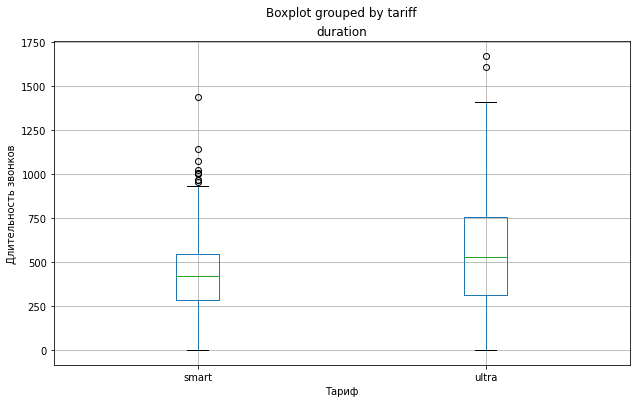

In [36]:
# Сравним распределение длительности разговоров за месяц пользователей тарифов ultra и smart
month_inc.boxplot(column='duration', by='tariff', figsize=(10, 6))
plt.ylabel('Длительность звонков')
plt.xlabel('Тариф')

Text(0.5, 0, 'Длительность звонков')

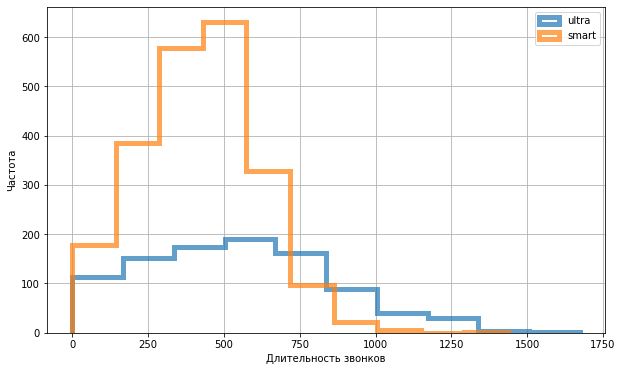

In [37]:
ax = month_inc.query('tariff == "ultra"')[['duration']].plot(kind='hist', histtype='step', linewidth=5, alpha=0.7)
(month_inc.query('tariff == "smart"')[['duration']]
 .plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, figsize=(10, 6), ax=ax, grid=True))
plt.legend(['ultra','smart'])
plt.ylabel('Частота')
plt.xlabel('Длительность звонков')

Пользователям тарифа smart требуется на 112 минут меньше разговора в месяц, чем пользователям тарифа ultra:
медиана тарифа smart - 423 минут, медиана тарифа ultra - 531 минут.

50% респондентов тарифа smart тратят на разговоры в месяц от 285 до 545 минут, это на 215 минут меньше, чем 50% респондентов тарифа ultra: от 315 до 760 минут.

Нормальное распределение длительности разговоров за месяц пользователей разных тарифов уже разнится на 500 минут:
у тарифа smart оно от 0 до 875 минут, у тарифа ultra - от 0 до 1375 минут.

На графиках видно, что большинство клиентов тарифа smart не разговаривают более 730 минут в месяц. Тогда как длительность разговоров клиентов тарифа ultra распределена более равномерно и на более широком диапазоне почти до 1250 минут.

(-10.0, 200.0)

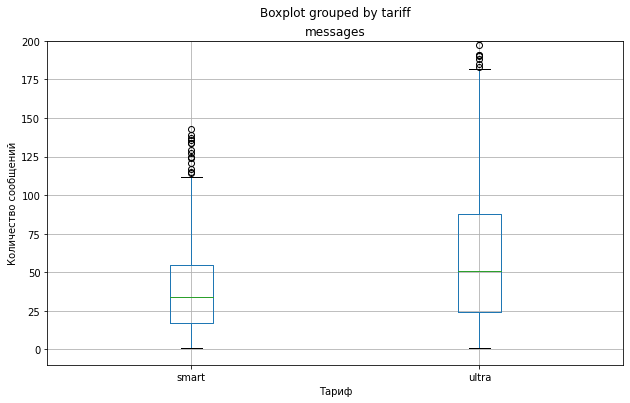

In [38]:
# Сравним распределение количества сообщений за месяц пользователей тарифов ultra и smart
month_inc.boxplot(column='messages', by='tariff', figsize=(10, 6))
plt.ylabel('Количество сообщений')
plt.xlabel('Тариф')
plt.ylim(-10, 200)

Text(0.5, 0, 'Количество сообщений')

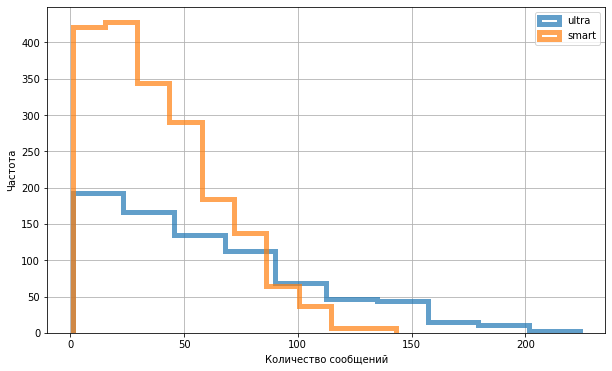

In [39]:
ax = month_inc.query('tariff == "ultra"')[['messages']].plot(kind='hist', histtype='step', linewidth=5, alpha=0.7)
(month_inc.query('tariff == "smart"')[['messages']]
 .plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, figsize=(10, 6), ax=ax, grid=True))
plt.legend(['ultra','smart'])
plt.ylabel('Частота')
plt.xlabel('Количество сообщений')

Пользователи тарифа smart отправляют на 33% меньше сообщений в месяц, чем пользователи тарифа ultra: медиана тарифа smart - 34 сообщений, медиана тарифа ultra - 51 сообщений.

Половина респондентов тарифа smart отправляют за месяц от 17 до 55 сообщений, это на 35% меньше, чем половина респондентов тарифа ultra: от 24 до 88 сообщений.

Нормальное распределение количества сообщений за месяц пользователей разных тарифов уже разнится на 41%: у тарифа smart оно от 0 до 112 сообщений, у тарифа ultra - от 0 до 185 сообщений.

На графиках видно, что клиенты тарифа smart в основном ограничиваются 80 сообщениями в месяц. Распределение количества отправляемых в месяц сообщений клиентами тарифа ultra гораздо равномернее и шире, до 160 сообщений.

Text(0.5, 0, 'Тариф')

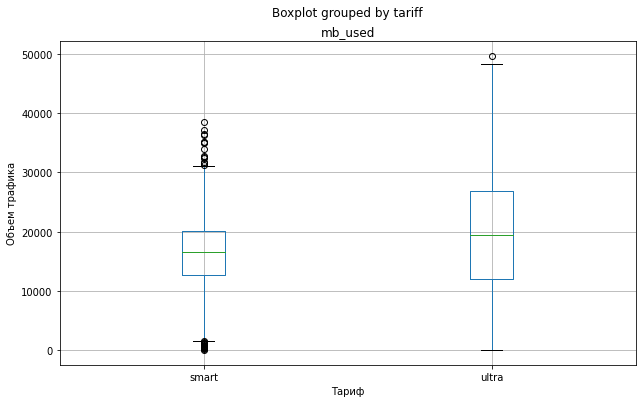

In [40]:
# Сравним распределение использованного за месяц интернет-трафика пользователями тарифов ultra и smart

month_inc.boxplot(column='mb_used', by='tariff', figsize=(10, 6))
plt.ylabel('Объем трафика')
plt.xlabel('Тариф')

Text(0.5, 0, 'Объем трафика')

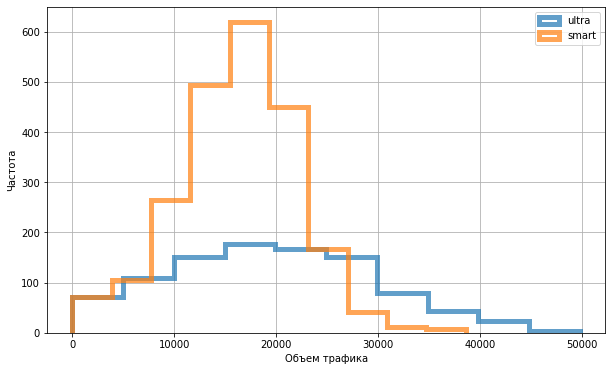

In [41]:
ax = month_inc.query('tariff == "ultra"')[['mb_used']].plot(kind='hist', histtype='step', linewidth=5, alpha=0.7)
(month_inc.query('tariff == "smart"')[['mb_used']]
 .plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, figsize=(10, 6), ax=ax, grid=True))
plt.legend(['ultra','smart'])
plt.ylabel('Частота')
plt.xlabel('Объем трафика')

Пользователям тарифа smart в месяц требуется на 3 гигабайта меньше интернет-трафика, чем пользователям тарифа ultra: медиана тарифа smart - 16532 мб (16 гб), медиана тарифа ultra - 19411 мб (19 гб). 

50% респондентов тарифа smart используют в месяц от 12668 до 20068 мб (12.4 - 19.6 гб), а 50% респондентов тарифа ultra используют в месяц от 12020 до 26920 мб (11.6 - 26.2 гб). 

Нормальное распределение использованного интернет-трафика за месяц пользователей разных тарифов тоже разнится: у тарифа smart оно от 2000 до 31000 мб (2 - 30.3 гб), у тарифа ultra - от 0 до 48000 мб (47 гб).

На графиках хорошо видно, что распределение потребляемого в месяц интернет-трафика клиентами тарифа smart довольно узкое и ограничено объемом 26800 мб (26 гб). Тогда как распределение потребляемого в месяц интернет-трафика клиентами тарифа ultra более равномерно распределено и значительно шире: до 40000 мб (39 гб).



In [42]:
# посчитаем долю людей, кто выходит за рамки тарифов
extra_cost_smart = month_inc[(month_inc['tariff'] == 'smart') & (month_inc['total'] > 550) ]
extra_cost_ultra = month_inc[(month_inc['tariff'] == 'ultra') & (month_inc['total'] > 1950) ]

smart = month_inc[month_inc['tariff'] == 'smart']
ultra = month_inc[month_inc['tariff'] == 'ultra']

print('Доля людей, которая выходит за рамки тарифа "smart":'"{:.0%}".format(len(extra_cost_smart)/len(smart)))
print('Доля людей, которая выходит за рамки тарифа "ultra":'"{:.0%}".format(len(extra_cost_ultra)/len(ultra)))

Доля людей, которая выходит за рамки тарифа "smart":75%
Доля людей, которая выходит за рамки тарифа "ultra":14%


# Промежуточный вывод (3 шага) С АПДЕЙТОМ

Пользователи тарифа smart представляют устоявшуюся, стабильную по своим потребностям, группу, без выдающихся значений по длительности разговоров, количеству отправляемых сообщений и объему использованного интернет-трафика.
Ряды пользователей тарифа ultra неоднородны: в них есть и те, кто очень много разговаривает и те, кто отправляет очень много сообщений, есть и активные пользователи интернета. Значит, у этой группы есть потенциал роста.
В результате проведенного анализа установлено, что большинство клиентов тарифа smart не разговаривают более 730 минут в месяц. Тогда как длительность разговоров клиентов тарифа ultra распределена более равномерно и на более широком диапазоне почти до 1250 минут.
Обнаружено, что клиенты тарифа smart в основном ограничиваются 80 сообщениями в месяц. Распределение количества отправляемых в месяц сообщений клиентами тарифа ultra гораздо шире, до 160 сообщений.
Распределение потребляемого в месяц интернет-трафика клиентами тарифа smart довольно узкое и ограничено объемом 26800 мб (22 гб). Тогда как распределение потребляемого в месяц интернет-трафика клиентами тарифа ultra более равномерно распределено и значительно шире: до 40000 мб (39 гб).

Если проанализировать пакет услуг, входящий в тариф "Смарт", то мы можем наблюдать, что:

в абонентскую плату тарифа "Смарт" входит 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика.
Исходя из значений медианы тарифа "Смарт" по длительности разговоров, количеству сообщений и использованного объема интернет-трафика, можно заключить, что пакета услуг явно недостаточно для 50% пользователей тарифа "Смарт". Им приходится ежемесячно переплачивать за использованные услуги сверх тарифа.
Значит эти пользователи являются потенциальными клиентами тарифа "Ультра" с более широким пакетом услуг. То есть для оператора связи рекламная аудитория увеличивается на 50% пользователей тарифа "Смарт".
почти 75 процентов пользователей выходят за рамки возможности тарифа, думаю, что им стоит подобрать более соответствующий тариф.

Если проанализировать пакет услуг, входящий в тариф "Ультра", то мы можем наблюдать, что:

в абонентскую плату тарифа "Ультра" входит 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика.
Исходя из показателей нормального распределения тарифа "Ультра" по длительности разговоров, количеству сообщений и объема использованного интернет-трафика, видно, что потребности большинства пользователей тарифа "Ультра" полностью удовлетворены в части звонков и смс. Клиентам не приходится переплачивать сверх абонентской платы. В целом, данная клиентская группа является лояльной в части удовлетворенности своим тарифом.
В отличии от тарифа "смарт", в тарифе ультра только 14 процентов пользователей выходят за рамки тарифа!

# 4. Проверим гипотезы

In [43]:
# Проверим гипотезу, что средняя выручка пользователей тарифов "Ультра" и "Смарт" различается
month_inc.groupby('tariff')['total'].describe()

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,2230.0,1289.641704,818.370799,550.0,550.0,1021.0,1750.0,6770.0
ultra,986.0,2070.030426,376.015578,1950.0,1950.0,1950.0,1950.0,4800.0


Исходя из показателей медианы, среднего и стандартного отклонения выручки пользователей тарифов ultra и smart можно предположить, что средняя выручка первых 2072 руб. сильно отличается от средней выручки вторых 1294 руб. Проверим это методами статистического анализа

Чтобы проверить гипотезу о равенстве средней выручки двух генеральных совокупностей - пользователей тарифа "Ультра" и тарифа "Смарт", применим метод scipy.stats.ttest_ind(). Данный метод применяется к двум независимым совокупностям, а пользователи тарифов "Ультра" и "Смарт" составляют независимые совокупности, так как это разные люди, поведение которых не зависит друг от друга.

Сформулируем нулевую гипотезу: Средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт".
Тогда альтернативная гипотеза будет звучать так: Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

Зададим критический уровень статистической значимости alpha равным 5% и проверим нулевую гипотезу

In [44]:
alpha = .05
results = st.ttest_ind(month_inc.query('tariff == "ultra"')['total'], month_inc.query('tariff == "smart"')['total'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


Как видно, р-значение значительно меньше 5%, оно стремится к нулю.
Поэтому мы отвергаем выдвинутую нами нулевую гипотезу о равенстве средней выручки пользователей тарифов "Ультра" и "Смарт".
Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

In [45]:
#Проверим гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
month_inc.query('city == "Москва"')['total'].describe()

count     611.000000
mean     1546.713584
std       752.088071
min       550.000000
25%       780.500000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: total, dtype: float64

In [46]:
month_inc.query('city != "Москва"')['total'].describe()

count    2605.000000
mean     1524.725144
std       808.745680
min       550.000000
25%       750.000000
50%      1583.000000
75%      1950.000000
max      6770.000000
Name: total, dtype: float64

Исходя из показателей медианы, среднего и стандартного отклонения выручки пользователей из Москвы и других регионов можно предположить, что средняя выручка москвичей 1550 руб. почти не отличается от средней выручки не москвичей 1527 руб. Проверим это методами статистического анализа

Чтобы проверить гипотезу о равенстве средней выручки двух генеральных совокупностей - пользователей из Москвы и пользователей из других регионов, также применим метод scipy.stats.ttest_ind(), который применяется к двум независимым совокупностям. Ведь жители Москвы и других регионов - это разные люди, значит они составляют две независимые совокупности.

Сформулируем нулевую гипотезу: Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
Тогда альтернативная гипотеза будет звучать так: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Зададим критический уровень статистической значимости alpha равным 5% и проверим нулевую гипотезу



In [47]:
alpha = .05
results = st.ttest_ind(month_inc.query('city == "Москва"')['total'], month_inc.query('city != "Москва"')['total'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


Как видно, р-значение более 50% и значительно превышает уровень статистической значимости.
Значит, мы не отвергаем нулевую гипотезу о том, что Cредняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.


In [48]:
# Промежуточный вывод (шага 4)

Для проведения сравнительного анализа основной метрики - средней выручки тарифов "Ультра" и "Смарт", были сформулированы и проанализированы две гипотезы:

Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
В результате проведенного статистического анализа мы выяснили, что:

1. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается. Причем средняя выручка тарифа "Ультра" составляет почти 160% от средней выручки тарифа "Смарт".

2. Cредняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов. Показатели почти равны: 1550 руб. и 1527 руб. соответственно.

Таким образом мы установили, что наиболее перспективным тарифом в плане роста доходности для оператора сотовой связи "Мегалайн" является тариф "Ультра". Причем развивать его следует не только в Москве, а на всей территории Российской Федерации.

# Вывод (шаг 5)

Данные приведены к нужным типам (datetime), были найдены и исправлены ошибки в данных (удалили один дублирущий столбец) В данных есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять. в таблице 'users' есть пропуски данных, это значит, что тариф ещё действовал на момент выгрузки данных.

Округлили минуты звонков, так как та тариф говорит нам, что проговорив 1 секунду, будет защитано, как 1 минута, а также округлили трафик использованного интернета.

Посчитали для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя;

была создана таблица с информацией о доходе с каждого пользователя помесячно (month_inc)
Данные очень аккуратные и чистые, без дубликатов

Пользователи тарифа smart представляют устоявшуюся, стабильную по своим потребностям, группу, без выдающихся значений по длительности разговоров, количеству отправляемых сообщений и объему использованного интернет-трафика. Ряды пользователей тарифа ultra неоднородны: в них есть и те, кто очень много разговаривает и те, кто отправляет очень много сообщений, есть и активные пользователи интернета. Значит, у этой группы есть потенциал роста. В результате проведенного анализа установлено, что большинство клиентов тарифа smart не разговаривают более 730 минут в месяц. Тогда как длительность разговоров клиентов тарифа ultra распределена более равномерно и на более широком диапазоне почти до 1250 минут. Обнаружено, что клиенты тарифа smart в основном ограничиваются 80 сообщениями в месяц. Распределение количества отправляемых в месяц сообщений клиентами тарифа ultra гораздо шире, до 160 сообщений. Распределение потребляемого в месяц интернет-трафика клиентами тарифа smart довольно узкое и ограничено объемом 26800 мб (22 гб). Тогда как распределение потребляемого в месяц интернет-трафика клиентами тарифа ultra более равномерно распределено и значительно шире: до 40000 мб (39 гб).

Если проанализировать пакет услуг, входящий в тариф "Смарт", то мы можем наблюдать, что:

в абонентскую плату тарифа "Смарт" входит 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика. Исходя из значений медианы тарифа "Смарт" по длительности разговоров, количеству сообщений и использованного объема интернет-трафика, можно заключить, что пакета услуг явно недостаточно для 50% пользователей тарифа "Смарт". Им приходится ежемесячно переплачивать за использованные услуги сверх тарифа. Значит эти пользователи являются потенциальными клиентами тарифа "Ультра" с более широким пакетом услуг. То есть для оператора связи рекламная аудитория увеличивается на 50% пользователей тарифа "Смарт".

Если проанализировать пакет услуг, входящий в тариф "Ультра", то мы можем наблюдать, что:

в абонентскую плату тарифа "Ультра" входит 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика. Исходя из показателей нормального распределения тарифа "Ультра" по длительности разговоров, количеству сообщений и объема использованного интернет-трафика, видно, что потребности большинства пользователей тарифа "Ультра" полностью удовлетворены в части звонков и смс. Клиентам не приходится переплачивать сверх абонентской платы. Однако 25% пользователей ежемесячно используют более, чем предоставленные пакетом услуг 30 Гб интернет-трафика, и за это им приходится доплачивать оператору. В целом, данная клиентская группа является лояльной в части удовлетворенности своим тарифом.

Для проведения сравнительного анализа основной метрики - средней выручки тарифов "Ультра" и "Смарт", были сформулированы и проанализированы две гипотезы:

Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
В результате проведенного статистического анализа мы выяснили, что:

1. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается. Причем средняя выручка тарифа "Ультра" составляет почти 160% от средней выручки тарифа "Смарт".

2. Cредняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов. Показатели почти равны: 1550 руб. и 1527 руб. соответственно.

Таким образом мы установили, что наиболее перспективным тарифом в плане роста доходности для оператора сотовой связи "Мегалайн" является тариф "Ультра". Причем развивать его следует не только в Москве, а на всей территории Российской Федерации.